In [1]:
import xarray as xr
import numpy as np

In [3]:
cd /g/data/tm70/ek4684/inputs/access-om3/0.x.0/025deg/

/g/data/tm70/ek4684/inputs/access-om3/0.x.0/025deg


In [3]:
ls

cice/  mom/  share/  ww3/


In [4]:
ls share

access-om2-025deg-ESMFmesh.nc  grid.nc*  ocean_hgrid.nc*  topog.nc
generate_mesh.py               meshes/   ocean_mask.nc


In [5]:
ls cice

grid.nc*  i2o.nc*  kmt.nc  monthly_sstsss.nc*  o2i.nc  u_star.nc*


In [6]:
ls mom

chl.nc*               ocean_mask.nc           ocean_vgrid.nc*       tideamp.nc*
grid_spec.nc*         ocean_mask_table        roughness_amp.nc*     topog.nc
mask_table.464.48x40  ocean_mosaic.nc*        roughness_cdbot.nc*
ocean_hgrid.nc*       ocean_temp_salt.res.nc  salt_sfc_restore.nc*


In [7]:
xr.open_dataset('cice/u_star.nc')

0.3.0


<xarray.Dataset>
Dimensions:  (ny: 1080, nx: 1440)
Dimensions without coordinates: ny, nx
Data variables:
    u_star   (ny, nx) float64 ...

In [8]:
xr.open_dataset('cice/kmt.nc')

<xarray.Dataset>
Dimensions:  (ny: 1080, nx: 1440)
Dimensions without coordinates: ny, nx
Data variables:
    kmt      (ny, nx) float64 ...
Attributes:
    NCO:      netCDF Operators version 5.1.3 (Homepage = http://nco.sf.net, C...
    history:  Thu May 11 13:33:45 2023: ncrename -O -v mask,kmt ocean_mask.nc...

In [5]:
mesh = xr.open_dataset('share/access-om2-025deg-ESMFmesh.nc')

0.3.0


In [6]:
mesh

<xarray.Dataset>
Dimensions:         (nodeCount: 1555447, coordDim: 2, elementCount: 1555200,
                     maxNodePElement: 4)
Dimensions without coordinates: nodeCount, coordDim, elementCount,
                                maxNodePElement
Data variables:
    nodeCoords      (nodeCount, coordDim) float64 ...
    elementConn     (elementCount, maxNodePElement) int32 ...
    numElementConn  (elementCount) int32 ...
    centerCoords    (elementCount, coordDim) float64 ...
    elementMask     (elementCount) int8 ...
    elementArea     (elementCount) float64 ...
Attributes:
    gridType:       unstructured mesh
    timeGenerated:  2024-02-21 13:00:53.889926
    created_by:     ek4684
    inputFile:      ocean_hgrid.nc, ocean_mask.nc
    history:        Created using: python3 /g/data/tm70/ek4684/inputs/access-...

In [17]:
mesh.nodeCoords[0].values

array([ 80.        , -81.12980013])

In [21]:
mesh.nodeCoords[1].values

array([ 80.25      , -81.12980013])

In [22]:
mesh.nodeCoords[2].values

array([ 80.25      , -81.02420154])

In [23]:
mesh.nodeCoords[3].values

array([ 80.        , -81.02420154])

In [8]:
1080*1440

1555200

In [11]:
cice_grid = xr.open_dataset('cice/grid.nc')

In [13]:
cice_grid

<xarray.Dataset>
Dimensions:  (ny: 1080, nx: 1440)
Dimensions without coordinates: ny, nx
Data variables:
    ulat     (ny, nx) float64 ...
    ulon     (ny, nx) float64 ...
    tlat     (ny, nx) float64 ...
    tlon     (ny, nx) float64 ...
    htn      (ny, nx) float64 ...
    hte      (ny, nx) float64 ...
    angle    (ny, nx) float64 ...
    angleT   (ny, nx) float64 ...
    tarea    (ny, nx) float64 ...
    uarea    (ny, nx) float64 ...

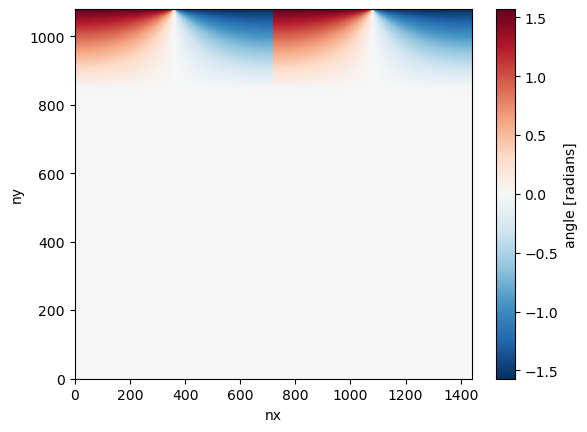

In [12]:
cice_grid.angle.plot()

In [35]:
np.rad2deg(cice_grid.ulon.isel(ny=-2).values)

array([-280.        , -279.99792557, -279.99585107, ...,   79.9937764 ,
         79.99585107,   79.99792557])

In [27]:
np.rad2deg(cice_grid.tlon.isel(ny=-1).values)

array([-279.99948179, -279.99844535, -279.99740885, ...,   79.99740885,
         79.99844535,   79.99948179])

In [4]:
mom_grid = xr.open_dataset('mom/ocean_hgrid.nc')

In [5]:
mom_grid

<xarray.Dataset>
Dimensions:   (nyp: 2161, nxp: 2881, nx: 2880, ny: 2160)
Dimensions without coordinates: nyp, nxp, nx, ny
Data variables:
    tile      |S255 ...
    x         (nyp, nxp) float64 ...
    y         (nyp, nxp) float64 ...
    dx        (nyp, nx) float64 ...
    dy        (ny, nxp) float64 ...
    angle_dx  (nyp, nxp) float64 ...
    area      (ny, nx) float64 ...

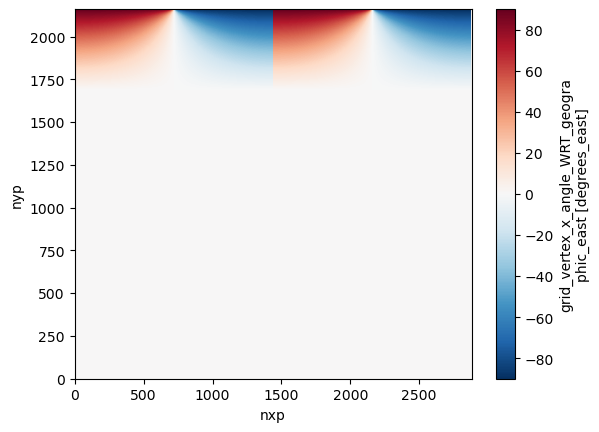

In [6]:
mom_grid.angle_dx.plot()

In [24]:
mom_grid.x[2::2, 2::2]

<xarray.DataArray 'x' (nyp: 1080, nxp: 1440)>
[1555200 values with dtype=float64]
Dimensions without coordinates: nyp, nxp
Attributes:
    standard_name:  geographic_longitude
    units:          degree_east

In [7]:
npnp.deg2rad(mom_grid.x[2::2, 2::2])

<xarray.DataArray 'x' (nyp: 1080, nxp: 1440)>
array([[-4.88255858, -4.87819526, -4.87383194, ...,  1.38753676,
         1.39190008,  1.3962634 ],
       [-4.88255858, -4.87819526, -4.87383194, ...,  1.38753676,
         1.39190008,  1.3962634 ],
       [-4.88255858, -4.87819526, -4.87383194, ...,  1.38753676,
         1.39190008,  1.3962634 ],
       ...,
       [-4.88684947, -4.88677703, -4.88670459, ...,  1.39611853,
         1.39619097,  1.3962634 ],
       [-4.8868857 , -4.88684949, -4.88681328, ...,  1.39619099,
         1.3962272 ,  1.3962634 ],
       [-4.88692191, -4.88692191, -4.88692191, ...,  1.3962634 ,
         1.3962634 ,  1.3962634 ]])
Dimensions without coordinates: nyp, nxp
Attributes:
    standard_name:  geographic_longitude
    units:          degree_east

In [36]:
mom_grid.x[-3, 2::2].values

array([-279.99792557, -279.99585107, -279.9937764 , ...,   79.99585107,
         79.99792557,   80.        ])

In [33]:
mom_grid.x[0].values

array([-280.   , -279.875, -279.75 , ...,   79.75 ,   79.875,   80.   ])

In [32]:
xr.open_dataset('mom/topog.nc')

<xarray.Dataset>
Dimensions:  (ny: 1080, nx: 1440)
Dimensions without coordinates: ny, nx
Data variables:
    depth    (ny, nx) float32 ...
Attributes:
    history:   | Created on Mon May 15 13:42:57 AEST 2023 using https://githu...

In [10]:
deg1_mesh = xr.open_dataset('/g/data/ik11/inputs/access-om3/0.x.0/1deg/share/access-om2-1deg-ESMFmesh.nc')

In [18]:
deg1_mesh.nodeCoords[0].values

array([ 80., -78.])

In [19]:
deg1_mesh.nodeCoords[1].values

array([ 81., -78.])

In [20]:
deg1_mesh.nodeCoords[2].values

array([ 81.        , -77.75316839])

In [24]:
deg1_mesh.nodeCoords[3].values

array([ 80.        , -77.75316839])

In [12]:
300*360

108000

In [34]:
cice1_grid = xr.open_dataset('/g/data/ik11/inputs/access-om3/0.x.0/1deg/cice/grid.nc')

In [36]:
np.rad2deg(cice1_grid.ulon.isel(ny=0).values)

array([-278.99999784, -277.99999785, -276.99999785, -275.99999786,
       -274.99999787, -273.99999788, -272.99999789, -271.99999789,
       -270.9999979 , -269.99999791, -268.99999792, -267.99999792,
       -266.99999793, -265.99999794, -264.99999795, -263.99999795,
       -262.99999796, -261.99999797, -260.99999798, -259.99999799,
       -258.99999799, -257.999998  , -256.99999801, -255.99999802,
       -254.99999802, -253.99999803, -252.99999804, -251.99999805,
       -250.99999806, -249.99999806, -248.99999807, -247.99999808,
       -246.99999809, -245.99999809, -244.9999981 , -243.99999811,
       -242.99999812, -241.99999813, -240.99999813, -239.99999814,
       -238.99999815, -237.99999816, -236.99999816, -235.99999817,
       -234.99999818, -233.99999819, -232.9999982 , -231.9999982 ,
       -230.99999821, -229.99999822, -228.99999823, -227.99999823,
       -226.99999824, -225.99999825, -224.99999826, -223.99999826,
       -222.99999827, -221.99999828, -220.99999829, -219.99999

In [42]:
np.rad2deg(cice1_grid.ulat.isel(nx=0).values)

array([-7.77531678e+01, -7.75057095e+01, -7.72569987e+01, -7.70064120e+01,
       -7.67533288e+01, -7.64971328e+01, -7.62372129e+01, -7.59729642e+01,
       -7.57037888e+01, -7.54290973e+01, -7.51483094e+01, -7.48608548e+01,
       -7.45661743e+01, -7.42637211e+01, -7.39529608e+01, -7.36333731e+01,
       -7.33044525e+01, -7.29657088e+01, -7.26166684e+01, -7.22568745e+01,
       -7.18858885e+01, -7.15032903e+01, -7.11086792e+01, -7.07016744e+01,
       -7.02819158e+01, -6.98490644e+01, -6.94028032e+01, -6.89428373e+01,
       -6.84688948e+01, -6.79807270e+01, -6.74781088e+01, -6.69608393e+01,
       -6.64287417e+01, -6.58816643e+01, -6.53194800e+01, -6.47420870e+01,
       -6.41494087e+01, -6.35413940e+01, -6.29180173e+01, -6.22792788e+01,
       -6.16252039e+01, -6.09558437e+01, -6.02712748e+01, -5.95715989e+01,
       -5.88569432e+01, -5.81274595e+01, -5.73833245e+01, -5.66247391e+01,
       -5.58519283e+01, -5.50651409e+01, -5.42646489e+01, -5.34507471e+01,
       -5.26237525e+01, -

In [37]:
mom1_grid = xr.open_dataset('/g/data/ik11/inputs/access-om3/0.x.0/1deg/mom/ocean_hgrid.nc')

In [38]:
mom1_grid

<xarray.Dataset>
Dimensions:   (nyp: 601, nxp: 721, nx: 720, ny: 600)
Dimensions without coordinates: nyp, nxp, nx, ny
Data variables:
    tile      |S255 ...
    x         (nyp, nxp) float64 ...
    y         (nyp, nxp) float64 ...
    dx        (nyp, nx) float64 ...
    dy        (ny, nxp) float64 ...
    angle_dx  (nyp, nxp) float64 ...
    area      (ny, nx) float64 ...

In [39]:
mom1_grid.x[0].values

array([-280. , -279.5, -279. , -278.5, -278. , -277.5, -277. , -276.5,
       -276. , -275.5, -275. , -274.5, -274. , -273.5, -273. , -272.5,
       -272. , -271.5, -271. , -270.5, -270. , -269.5, -269. , -268.5,
       -268. , -267.5, -267. , -266.5, -266. , -265.5, -265. , -264.5,
       -264. , -263.5, -263. , -262.5, -262. , -261.5, -261. , -260.5,
       -260. , -259.5, -259. , -258.5, -258. , -257.5, -257. , -256.5,
       -256. , -255.5, -255. , -254.5, -254. , -253.5, -253. , -252.5,
       -252. , -251.5, -251. , -250.5, -250. , -249.5, -249. , -248.5,
       -248. , -247.5, -247. , -246.5, -246. , -245.5, -245. , -244.5,
       -244. , -243.5, -243. , -242.5, -242. , -241.5, -241. , -240.5,
       -240. , -239.5, -239. , -238.5, -238. , -237.5, -237. , -236.5,
       -236. , -235.5, -235. , -234.5, -234. , -233.5, -233. , -232.5,
       -232. , -231.5, -231. , -230.5, -230. , -229.5, -229. , -228.5,
       -228. , -227.5, -227. , -226.5, -226. , -225.5, -225. , -224.5,
      

In [47]:
cd '/g/data/ik11/inputs/access-om2/input_20230515_025deg_topog/'

/g/data/ik11/inputs/access-om2/input_20230515_025deg_topog


In [48]:
mom_025 = xr.open_dataset('mom_025deg/ocean_hgrid.nc')

In [49]:
mom_025.x[0].values

array([-280.   , -279.875, -279.75 , ...,   79.75 ,   79.875,   80.   ])

In [42]:
ds = xr.open_dataset('/g/data/tm70/ek4684/inputs/access-om3/0.x.0/025deg/share/grid.nc')

np.rad2deg(ds['ulon'][0])

<xarray.DataArray 'ulon' (nx: 1440)>
array([-279.75, -279.5 , -279.25, ...,   79.5 ,   79.75,   80.  ])
Dimensions without coordinates: nx
Attributes:
    units:    radians
    title:    Longitude of U points

In [53]:
np.pi

3.141592653589793

In [43]:
np.rad2deg(ds['ulon'][-10][0].values)

-279.9803090972868

In [44]:
ds

<xarray.Dataset>
Dimensions:  (ny: 1080, nx: 1440)
Dimensions without coordinates: ny, nx
Data variables:
    ulat     (ny, nx) float64 ...
    ulon     (ny, nx) float64 ...
    tlat     (ny, nx) float64 ...
    tlon     (ny, nx) float64 ...
    htn      (ny, nx) float64 ...
    hte      (ny, nx) float64 ...
    angle    (ny, nx) float64 ...

In [57]:
cice_025 = xr.open_dataset('/g/data/ik11/inputs/access-om2/input_20230515_025deg_topog/cice_025deg/grid.nc')

In [8]:
cice_01 = xr.open_dataset('/g/data/ik11/inputs/access-om2/input_20200530/cice_01deg/grid.nc')

In [9]:
cice_01

<xarray.Dataset>
Dimensions:  (ny: 2700, nx: 3600, nc: 4)
Dimensions without coordinates: ny, nx, nc
Data variables: (12/14)
    ulat     (ny, nx) float64 ...
    ulon     (ny, nx) float64 ...
    tlat     (ny, nx) float64 ...
    tlon     (ny, nx) float64 ...
    clon_t   (nc, ny, nx) float64 ...
    clat_t   (nc, ny, nx) float64 ...
    ...       ...
    htn      (ny, nx) float64 ...
    hte      (ny, nx) float64 ...
    angle    (ny, nx) float64 ...
    angleT   (ny, nx) float64 ...
    tarea    (ny, nx) float64 ...
    uarea    (ny, nx) float64 ...

In [36]:
np.rad2deg(cice_01.ulon[0,-2].values)

79.89999999999489

In [35]:
np.rad2deg(np.deg2rad(-279.9).astype('float32'))

-279.9